In [1]:
# run all these code in jupyter notenook

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
'''
divide the dataset into train_set and test_set
csv_path: the path of .csv file
col_name: the name of columns in train_set
ratio: ratio of train data and whole dataset

return X_train_set, X_test_set, y_ori, y_shuttle
'''
def divide_set(csv_path,col_names,ratio):
    
    dframe = pd.read_csv(path, names = col_names)
    
    x = dframe.loc[:, col_names[0]:col_names[-2]] 
    y = dframe.loc[:, col_names[-1]]
    
    X, Y = shuffle(x,y)#,random_state=0
    
    X_nor = (X - X.min())/(X.max() - X.min())#normalize
    
    X_i = X_nor.reset_index(drop=False)# reset orders
    Y = Y.reset_index(drop=False)
    q = len(X_nor)*ratio#number of train data
    X_train_set = X_i.loc[:int(q)-1]
    X_test_set = X_i.loc[int(q):]
    
    X_train_set = np.array(X_train_set)
    X_test_set = np.array(X_test_set)
    Y = np.array(Y)
    
    return X_train_set, X_test_set, y, Y
'''
calculate the distance between new instance and instances in train_set
dis[i,0]: the index of instance in train_set
dis[i,1]: the distance
return the k most nearest instances
'''
def distance(trainset, new, k):
    dis = np.zeros((len(trainset),2))
    for i in range(len(trainset)):
        #calculate the European distance
        square = np.power((new[1:] - trainset[i, 1:]),2)
        d = np.power(np.sum(square),0.5)
        dis[i,0] = trainset[i,0] #index
        dis[i,1] = d #distance
    dis = dis[dis[:,1].argsort()]
    
    return dis[:k,:]
# determine the label of new instance according to the majority labels of k-nearest instances 
# y: the class set without shuttle, use it to locate the real label of new instance
# return predict label of new ins
def label(d_set,y):
    ll = list()
    for j in range(len(d_set)):
        ll.append(y[int(d_set[j,0])])
 
    final_label = max(set(ll), key=ll.count)
    
    return final_label
# calculate the number of correct prediction
# x = 1: evaluate testing set;
# x = 0: evaluate training set
def correct_num(X_train_set, predict_set,k,y, Y,x = 1):
    if x == 1:
        length = len(X_train_set)
    else:
        length = 0
    r = 0
    for i in range(len(predict_set)):
        newone = predict_set[i]
  
        d = distance(X_train_set,newone,k)
            
        final_label = label(d,y)
        if (final_label == Y[int(length+i),1]):
            r = r + 1
    return r

def acc_plot(accuracy, set_name ='testing set(%)',save_name = 'k-nn(test)1.png'):
    avg_accuracy = np.mean(accuracy, axis = 0)

    x=np.linspace(1,51,26)
    y=avg_accuracy
    std = np.std(accuracy, axis=0)
    plt.figure(figsize=(12, 8))
    plt.ylabel('Average accuracy over ' + set_name, fontsize=12)
    plt.ylim(80,101)
    plt.xlim(0,52)
    plt.xlabel('k', fontsize=12)
    plt.errorbar(x,y,yerr=std,fmt='o',ecolor='r',color='b',elinewidth=2,capsize=4)
    plt.plot(x,y)

    plt.savefig('/home/jingran/Documents/' + save_name,dpi = 800)
    plt.show()


------------------------------------------------------------------------
The accuracy of 1-nn is 96.66666666666667
The accuracy of 3-nn is 96.66666666666667
The accuracy of 5-nn is 96.66666666666667
The accuracy of 7-nn is 100.0
The accuracy of 9-nn is 96.66666666666667
The accuracy of 11-nn is 100.0
The accuracy of 13-nn is 96.66666666666667
The accuracy of 15-nn is 100.0
The accuracy of 17-nn is 100.0
The accuracy of 19-nn is 96.66666666666667
The accuracy of 21-nn is 96.66666666666667
The accuracy of 23-nn is 100.0
The accuracy of 25-nn is 100.0
The accuracy of 27-nn is 96.66666666666667
The accuracy of 29-nn is 96.66666666666667
The accuracy of 31-nn is 96.66666666666667
The accuracy of 33-nn is 96.66666666666667
The accuracy of 35-nn is 96.66666666666667
The accuracy of 37-nn is 96.66666666666667
The accuracy of 39-nn is 96.66666666666667
The accuracy of 41-nn is 93.33333333333333
The accuracy of 43-nn is 93.33333333333333
The accuracy of 45-nn is 93.33333333333333
The accuracy of

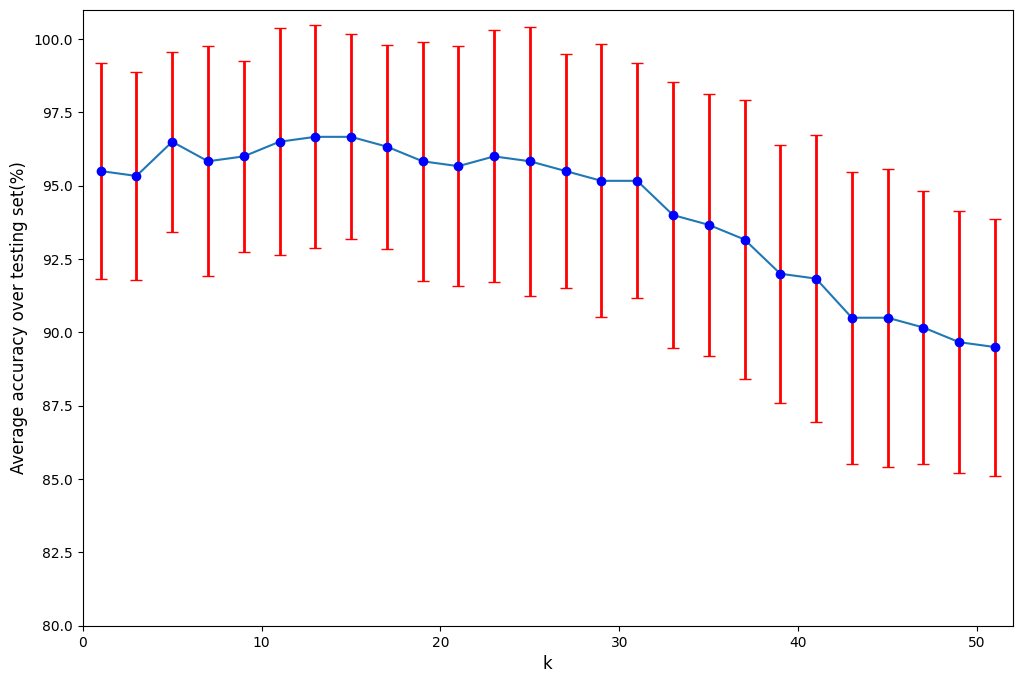

In [3]:
path = '/home/jingran/Downloads/iris.csv'
col_names=['fl','fw','pl','pw','species']
ratio = 0.8
k = 1
k_max = 52
times = 20
accuracy = np.zeros((20,int(k_max/2)))
for j in range(times):
    print('------------------------------------------------------------------------')
    X_train_set, X_test_set, y ,Y = divide_set(path,col_names,ratio)

    while(k < k_max):
        r = correct_num(X_train_set, X_test_set,k,y, Y)
        corr_rate = (r/len(X_test_set))*100
        print('The accuracy of '+ str(k) +'-nn is '+ str(corr_rate))
        accuracy[j,int((k-1)/2)] = corr_rate
        k = k + 2
    k = 1
print(accuracy)
acc_plot(accuracy)

------------------------------------------------------------------------
The accuracy of 1-nn is 100.0
The accuracy of 3-nn is 95.83333333333334
The accuracy of 5-nn is 96.66666666666667
The accuracy of 7-nn is 97.5
The accuracy of 9-nn is 95.83333333333334
The accuracy of 11-nn is 95.83333333333334
The accuracy of 13-nn is 95.0
The accuracy of 15-nn is 97.5
The accuracy of 17-nn is 96.66666666666667
The accuracy of 19-nn is 95.0
The accuracy of 21-nn is 95.83333333333334
The accuracy of 23-nn is 95.0
The accuracy of 25-nn is 95.0
The accuracy of 27-nn is 95.0
The accuracy of 29-nn is 94.16666666666667
The accuracy of 31-nn is 95.0
The accuracy of 33-nn is 95.0
The accuracy of 35-nn is 95.0
The accuracy of 37-nn is 95.0
The accuracy of 39-nn is 94.16666666666667
The accuracy of 41-nn is 94.16666666666667
The accuracy of 43-nn is 93.33333333333333
The accuracy of 45-nn is 94.16666666666667
The accuracy of 47-nn is 90.83333333333333
The accuracy of 49-nn is 90.0
The accuracy of 51-nn is 

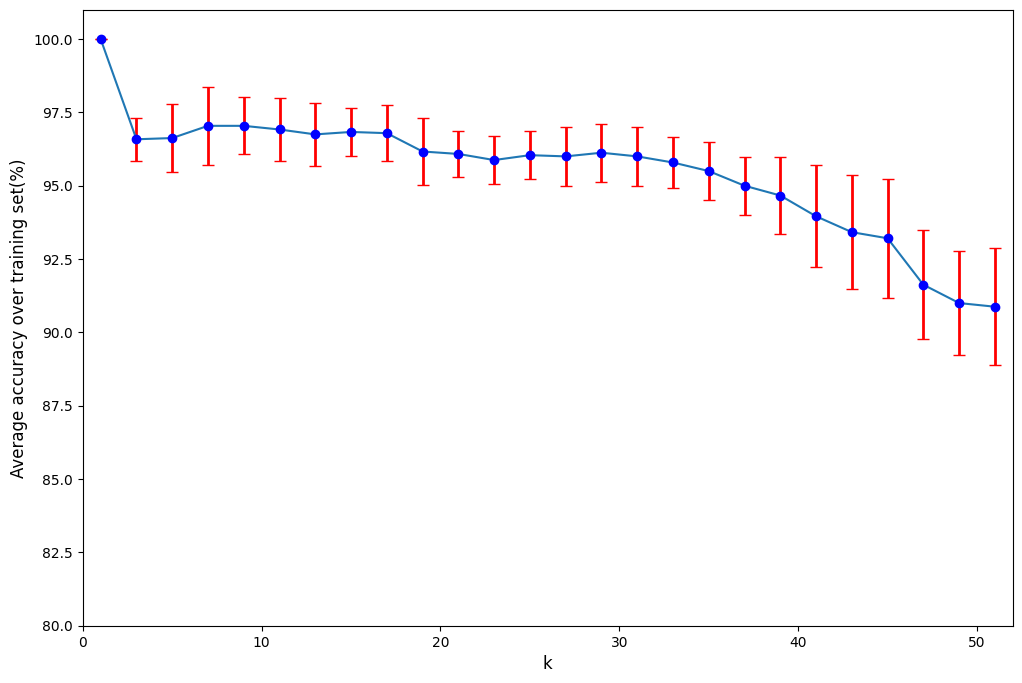

In [4]:
path = '/home/jingran/Downloads/iris.csv'
col_names=['fl','fw','pl','pw','species']
ratio = 0.8
k = 1
k_max = 52
times = 20
accuracy1 = np.zeros((20,int(k_max/2)))
for j in range(times):
    print('------------------------------------------------------------------------')
    X_train_set, X_test_set, y ,Y = divide_set(path,col_names,ratio)

    while(k < k_max):
        r = correct_num(X_train_set, X_train_set,k,y, Y, x = 0)
        corr_rate = (r/len(X_train_set))*100
        print('The accuracy of '+ str(k) +'-nn is '+ str(corr_rate))
        accuracy1[j,int((k-1)/2)] = corr_rate
        k = k + 2
    k = 1
print(accuracy1)
acc_plot(accuracy1,set_name ='training set(%)',save_name = 'k-nn(train)1.png')


In [ ]:
#don't use
'''
path = '/home/jingran/Downloads/iris.csv'
col_names=['fl','fw','pl','pw','species']
ratio = 0.8
k = 1
k_max = 52
times = 20
accuracy = np.zeros((20,int(k_max/2)))
for j in range(times):
    print('------------------------------------------------------------------------')
    X_train_set, X_test_set, y ,Y = divide_set(path,col_names,ratio)
    while(k < k_max):

        r = 0
        for i in range(len(X_train_set)):
            newone = X_train_set[i]
  
            d = distance(X_train_set,newone,k)
            
            final_label = label(d,y)
            if (final_label == Y[int(i),1]):
                r = r + 1
            else:
                print("The estimate label is ",final_label)
                print("The true label is ",Y[int(i)][1])
                print('The index of ' + str(int(X_train_set[i,0]))+' is not right.')
                print('-----------------------------------------------------------')
        print("The total number of wrong estimates is ", len(X_train_set)-r)
        corr_rate = (r/len(X_train_set))*100
        print('The accuracy of '+ str(k) +'-nn is '+ str(corr_rate))
        accuracy[j,int((k-1)/2)] = corr_rate
        k = k + 2
    k = 1

print(accuracy)
'''